In [1]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [3]:
input_size = 784 # 28x28
num_classes = 10
num_epochs = 2
batch_size = 100
learning_rate = 0.001

## Load the dataset

In [4]:
# MNIST dataset
train_dataset = torchvision.datasets.MNIST(root='./data',
                                           train=True,
                                           transform=transforms.ToTensor(),
                                           download=True)

In [5]:

test_dataset = torchvision.datasets.MNIST(root='./data',
                                          train=False,
                                          transform=transforms.ToTensor(),
                                          download=True)

In [6]:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True)

In [7]:
test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False)


# Data visualization

In [8]:
examples = iter(train_loader)
data, target = next(examples)
print(data.shape, target.shape)

torch.Size([100, 1, 28, 28]) torch.Size([100])


Traget_value: 7
Traget_value: 1
Traget_value: 6
Traget_value: 8
Traget_value: 7
Traget_value: 2


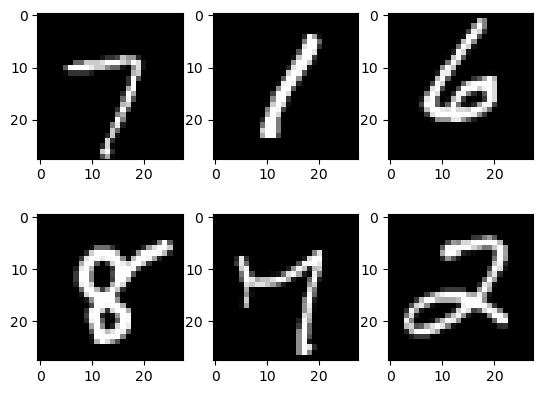

In [9]:
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(data[i][0],cmap='gray')
    print("Traget_value:",target[i].item())
plt.show()


# Model

In [23]:
class NeuralNet(nn.Module):
    def __init__(self, input_size, num_classes):
        super(NeuralNet, self).__init__()
        self.linear1 = nn.Linear(input_size, 500)
        self.relu = nn.ReLU()
        self.linear2 = nn.Linear(500, num_classes)

    def forward(self, x):
        x = x.view(x.shape[0],-1)
        x = self.linear1(x)
        x = self.relu(x)
        x = self.linear2(x)
        return x


In [24]:
model= NeuralNet(input_size, num_classes).to(device)

In [25]:
model

NeuralNet(
  (linear1): Linear(in_features=784, out_features=500, bias=True)
  (relu): ReLU()
  (linear2): Linear(in_features=500, out_features=10, bias=True)
)

In [26]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Training

In [27]:
total_batch = len(train_loader)

In [28]:
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = images.to(device)
        labels = labels.to(device)

        # Forward pass
        pred = model(images)
        loss = criterion(pred, labels)

        # Backward and optimize
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        if (i+1) % 100 == 0:
            print (f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{total_batch}], Loss: {loss.item():.4f}')


Epoch [1/2], Step [100/600], Loss: 0.3011
Epoch [1/2], Step [200/600], Loss: 0.3786
Epoch [1/2], Step [300/600], Loss: 0.2305
Epoch [1/2], Step [400/600], Loss: 0.1875
Epoch [1/2], Step [500/600], Loss: 0.1179
Epoch [1/2], Step [600/600], Loss: 0.2301
Epoch [2/2], Step [100/600], Loss: 0.0509
Epoch [2/2], Step [200/600], Loss: 0.1501
Epoch [2/2], Step [300/600], Loss: 0.0989
Epoch [2/2], Step [400/600], Loss: 0.0559
Epoch [2/2], Step [500/600], Loss: 0.1002
Epoch [2/2], Step [600/600], Loss: 0.0567


In [31]:
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)


        predicted = model(images)
        # max returns (value ,index)
        _, predicted = torch.max(predicted.data, 1)
        n_samples += labels.size(0)
        n_correct += (predicted == labels).sum().item()

    acc = 100.0 * n_correct / n_samples
    print(f'Accuracy of the network on the test images: {acc} %')

Accuracy of the network on the test images: 97.1 %
